 
# **UTS**

Senin, 17 Oktober 2022

**Analisa terhadap data Breast Cancer Coimbra Data Set dengan menggunakan klasifikasi :**


*   Metode KNN
*   Metode pohon kepuusan (Desicion Tree)





## **KNN (K-NEAREST NEIGHBOR)**

**- Definisi:**

K-NN adalah sebuah algoritma untuk melakukan klasifikasi terhadap objek dengan data latih yang jaraknya paling dekat dengan objek tersebut.

**- Algoritma KNN:**

1. Menentukan nilai K (jumlah tetangga. Misalnya kita mengambil 3 jumlah tetangga terdekat, maka nilai k=3
2.   Menghitung jarak data yang akan dievaluasi terhadap setiap data yang telah ada. Adapun rumus yang digunakan adalah rumus Euclidean (rumus untuk menghitung bobot kemiripan (*similarity*) dengan Nearest Neighbor 
terdekat) 
![image.png](https://cdn.mathpix.com/snip/images/G6AE0sijfP7MIP3eoonemtiOPf_I2H44TRZB0YImECk.original.fullsize.png)

3. Mengurutkan data berdasarkan jarak terkecil hingga terbesar
4. ambil 3 (k) tetangga yg paling dekat, lalu tentukan kelas dari data baru tersebut sesuai dengan tetangga terdekatnya.

**- Implementasi:**

Import semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Membaca dataset menggunakan library pandas

In [ ]:
url = 'https://raw.githubusercontent.com/RibutDwiArtah023/datamining/main/dataR2.csv'
data = pd.read_csv(url)

Periksa data apakah sudah dibaca dengan benar

In [ ]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Menampilkan 15 data awal

In [ ]:
data.head(15)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


Periksa jumlah baris dan kolom yang ada dalam kumpulan data

In [ ]:
data.shape

(116, 10)

In [ ]:
data.info

<bound method DataFrame.info of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.0

In [ ]:
#buat kerangka data dengan semua data pelatihan kecuali kolom target
X = data.drop(columns=["Classification"])
#periksa apakah variabel target telah dihapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#nilai target terpisah
y = data["Classification"].values
#lihat nilai target
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
# x sebagai variable independent
x = data.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [ ]:
# y sebagai variable dependent
y = data['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

Membagi data latih dan data uji

Pada tahap ini data yang jumlahnya 116 akan dibagi menjadi data latih dan data uji menggunakan **train_test_split** agar data yang dibagi seimbang

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [ ]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

In [ ]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#tampilkan 5 prediksi model pertama pada data uji
knn.predict(x_test)[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 1, 1])

In [ ]:
#periksa keakuratan model kami pada data uji
knn.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.4482758620689655

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal yang akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#buat model KNN baru
knn_cv = KNeighborsClassifier(n_neighbors=3)
#coba model dengan cv 5
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#cetak setiap skor cv (akurasi) dan rata-ratakan
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
#buat model KNN baru
knn2 = KNeighborsClassifier()
#buat kamus semua nilai yang ingin kami uji untuk n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#gunakan gridsearch untuk menguji semua nilai untuk n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#menyesuaikan model dengan data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#periksa nilai n_neighbors yang berkinerja terbaik
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#periksa skor rata-rata untuk nilai kinerja terbaik dari n_neighbors
knn_gscv.best_score_

0.5688405797101449

Menentukan nilai konstanta K

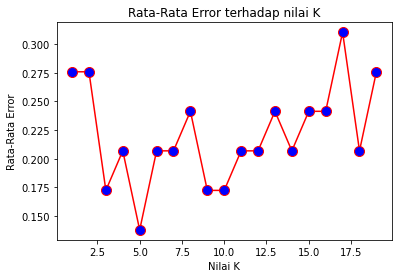

In [ ]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 20), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Training

Menggunaakn nilai konstanta K=2

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Menentukan hasil dari x_test

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0])

Menentukan probabilitas hasil prediksi

In [ ]:
classifier.predict_proba(x_test)

array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[12  1]
 [ 7  9]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.90      0.56      0.69        16

    accuracy                           0.72        29
   macro avg       0.77      0.74      0.72        29
weighted avg       0.78      0.72      0.72        29



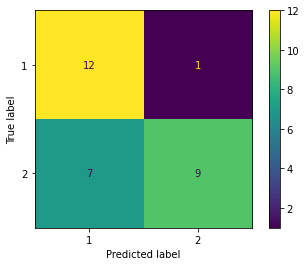

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

## **Decision Tree (Pohon Keputusan)**

**- Definisi :**
*   Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon. 
*   Konsepnya adalah dengan cara menyajikan algoritma dengan pernyataan bersyarat, yang meliputi cabang untuk mewakili langkah-langkah pengambilan keputusan yang dapat mengarah pada hasil yang menguntungkan. Dimana setiap cabang mewakili hasil untuk atribut, sedangkan jalur dari daun ke akar mewakili aturan untuk klasifikasi.
*   Pohon keputusan terdiri dari root node, internal node, dan leaf node

**- Algortima :**
1.   Memilih atribut terbaik menggunakan Attribution Selection Measures (ASM) untuk membagi records data
2.   Membuat atribut menjadi decision node dan memecah dataset menjadi subsets yang lebih kecil.
3.   Mulai membangun pohon dengan mengulangi proses ini secara rekursif, untuk setiap cabang sampai salah satu dari kondisi tersebut akan cocok

**- Implementasi :**



In [ ]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
url = 'https://raw.githubusercontent.com/RibutDwiArtah023/datamining/main/dataR2.csv'
data = pd.read_csv(url)

In [ ]:
data.head(-5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
106,45,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273,2
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.89000,209.190,2
108,68,35.560000,131,8.150,2.633537,17.8700,11.900000,4.19000,198.400,2
109,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,2


In [ ]:
# x sebagai variable independent
x = data.drop(['Classification'], axis = 1)
x.head

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554

In [ ]:
# y sebagai variable dependent
y = data['Classification']
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=0)

In [ ]:
print(x_train)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
43    69  32.500000       93    5.430  1.245642  15.1450    11.787960   
98    71  27.915519      104   18.200  4.668907  53.4997     1.656020   
80    59  28.672626       77    3.188  0.605507  17.0220    16.440480   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
31    53  36.790166      101   10.175  2.534932  27.1841    20.030000   
..   ...        ...      ...      ...       ...      ...          ...   
76    55  31.975015       92   16.635  3.775036  37.2234    11.018455   
10    34  21.470000       78    3.469  0.667436  14.5700    13.110000   
28    35  35.250761       90    6.817  1.513374  50.6094     6.966895   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
49    85  26.600000       96    4.462  1.056602   7.8500     7.931700   

     Resistin    MCP.1  
43   11.78796  270.142  
98   49.24184  256.001  
80   31.69040  910.489  
72    3.21000  513.660 

Membangun model Decision Tree

In [ ]:
# membangun decision tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train,y_train)

#Prediksi data test
y_pred = clf.predict(x_test)

Menampilkan akurasi

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.74      0.88      0.80        16

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.75        29



Visualisasi decision tree

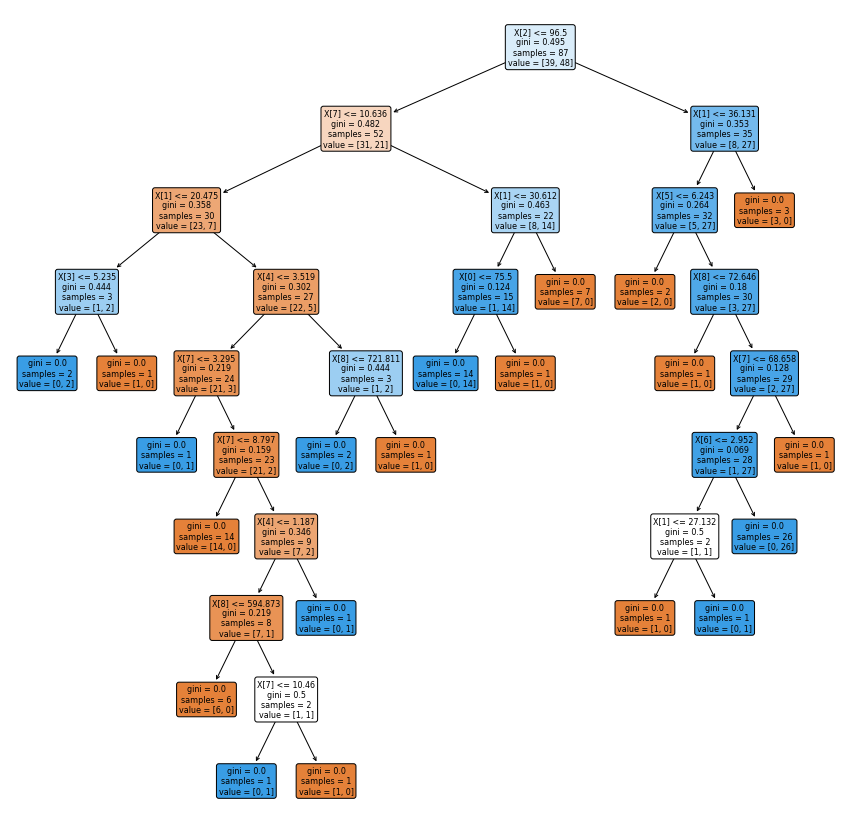

In [ ]:
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()